In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('./TSLA.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200
2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100
2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400
2022-12-01,197.080002,198.919998,191.800003,194.699997,194.699997,80046200
2022-12-02,191.779999,196.250000,191.110001,194.860001,194.860001,73645900


In [6]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


<AxesSubplot:xlabel='Date'>

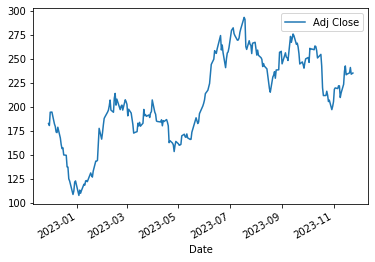

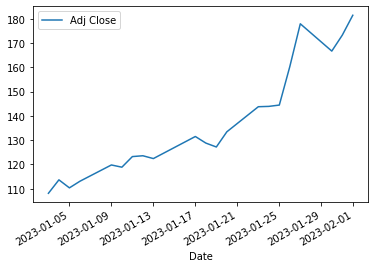

In [8]:
price_df = df.loc[:,['Adj Close']].copy()
price_df.plot()
price_df.loc['2023-01-01':'2023-02-01'].plot()

In [13]:
price_df['daily_profit'] = price_df['Adj Close'].pct_change() #calculating daily profit
price_df['st_profit'] = (1+price_df['daily_profit']).cumprod()
price_df.head(10)

,Adj Close,daily_profit,st_profit
Date,,,
2022-11-28,182.919998,NaN,NaN
2022-11-29,180.830002,-0.011426,0.988574
2022-11-30,194.699997,0.076702,1.064400
2022-12-01,194.699997,0.000000,1.064400
2022-12-02,194.860001,0.000822,1.065274
2022-12-05,182.449997,-0.063687,0.997431
2022-12-06,179.820007,-0.014415,0.983053
2022-12-07,174.039993,-0.032143,0.951454
2022-12-08,173.440002,-0.003447,0.948174


In [17]:
#calculating Compound Annual Growth Rate (CAGR)
cagr = price_df.loc['2023-11-24', 'st_profit']**(252/len(price_df.index))-1
# 2023-11-24 is the last day in the csv, 252 - working days
print(cagr)

0.2897769204046814


<AxesSubplot:xlabel='Date'>

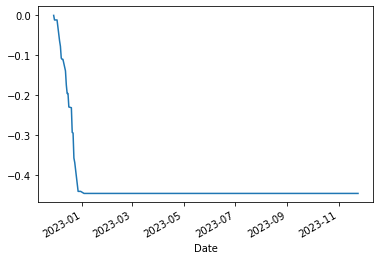

In [18]:
#calculating maximum drawdown
historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1
dd = daily_drawdown.cummin()
dd.plot()

In [21]:
#calculating volatile
vol = np.std(price_df['daily_profit'] * np.sqrt(252))
print(vol)

#calulating sharpe
sharpe = np.mean(price_df['daily_profit']) / np.std(price_df['daily_profit'])*np.sqrt(252)
print(sharpe)

0.5833674722995268
0.7308233953260788


In [24]:
print('cagr :', round(cagr*100,2), '%')
print('mdd :', round(dd.min()*100*-1,2), '%')
print('vol :', round(vol*100,2), '%')
print('sharpe :', round(sharpe,2))

cagr : 28.98 %
mdd : 44.52 %
vol : 58.34 %
sharpe : 0.73
